# Geohash + CID


Geohash functionality in Python [pygeohash](https://github.com/wdm0006/pygeohash)


In [ ]:
!pip install pygeohash

## Basic usage of pygeohash

In [1]:
import pygeohash as pgh

Can only import/use native python functions.


In [2]:
pgh.encode(latitude=42.6, longitude=-5.6)
# >>> 'ezs42e44yx96'

'ezs42e44yx96'

In [3]:
pgh.encode(latitude=42.6, longitude=-5.6, precision=5)
# >>> 'ezs42'

'ezs42'

In [4]:
pgh.decode(geohash='ezs42')
# >>> ('42.6', '-5.6')

(42.6, -5.6)

In [5]:
pgh.geohash_haversine_distance(geohash_1='bcd3u', geohash_2='bc83n')

179939.84348353872

In [6]:
pgh.eastern(geohash='kd3ybyu', direction='right')
# >>> kd3ybyv

TypeError: eastern() got an unexpected keyword argument 'geohash'

## Pipeline following Hojati's DSTree

In [2]:
##load geojson
import geopandas as gpd
import pandas as pd
import os

In [11]:
asset = "dc_restaurants"

In [12]:
demo_points = gpd.read_file(f"../../data/maryland_demo/{asset}.geojson")

<Axes: >

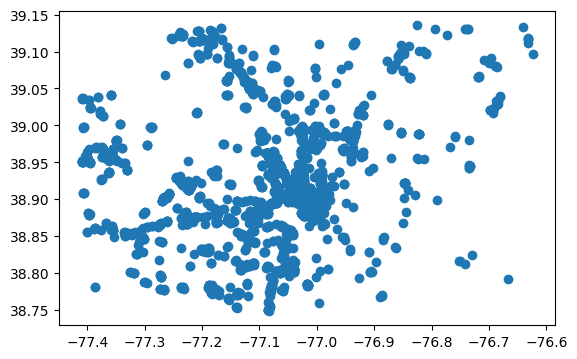

In [13]:
demo_points.plot()

In [14]:
demo_points = pd.concat([demo_points,demo_points.get_coordinates()],axis=1)

In [15]:
demo_points

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,addr:suite,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry,x,y
0,n255342748,255342748,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94680 38.99221),-76.946801,38.992208
1,n255342809,255342809,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,emergency,POINT (-76.94647 38.99222),-76.946472,38.992217
2,n258062907,258062907,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,D,Burke Centre Parkway,VA,22015,6003,Burke,NaN,POINT (-77.29676 38.78693),-77.296758,38.786931
3,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321),-76.943338,38.983212
4,n260321700,260321700,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94354 38.98330),-76.943537,38.983299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,n11275845269,11275845269,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Arlington Boulevard,VA,22042,7236,NaN,NaN,POINT (-77.19543 38.86694),-77.195429,38.866937
2671,n11282521337,11282521337,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Little River Turnpike,VA,NaN,7438,NaN,NaN,POINT (-77.20221 38.83249),-77.202206,38.832492
2672,n11285160608,11285160608,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,New Jersey Avenue Northwest,NaN,NaN,1545,NaN,NaN,POINT (-77.01643 38.91095),-77.016429,38.910949
2673,n11286073597,11286073597,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,K Street Northwest,NaN,NaN,1108,NaN,NaN,POINT (-77.02754 38.90226),-77.027543,38.902256


In [16]:
# calculate geohash for each point feature as well as CID
import pygeohash as pgh
demo_points['geohash'] = demo_points.apply(lambda row: pgh.encode(row['y'], row['x'],precision=6), axis=1)

In [17]:
demo_points

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry,x,y,geohash
0,n255342748,255342748,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94680 38.99221),-76.946801,38.992208,dqcmc4
1,n255342809,255342809,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,emergency,POINT (-76.94647 38.99222),-76.946472,38.992217,dqcmc4
2,n258062907,258062907,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Burke Centre Parkway,VA,22015,6003,Burke,NaN,POINT (-77.29676 38.78693),-77.296758,38.786931,dqch9h
3,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321),-76.943338,38.983212,dqcmc0
4,n260321700,260321700,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94354 38.98330),-76.943537,38.983299,dqcmc0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,n11275845269,11275845269,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Arlington Boulevard,VA,22042,7236,NaN,NaN,POINT (-77.19543 38.86694),-77.195429,38.866937,dqcj57
2671,n11282521337,11282521337,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Little River Turnpike,VA,NaN,7438,NaN,NaN,POINT (-77.20221 38.83249),-77.202206,38.832492,dqchgj
2672,n11285160608,11285160608,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,New Jersey Avenue Northwest,NaN,NaN,1545,NaN,NaN,POINT (-77.01643 38.91095),-77.016429,38.910949,dqcjr7
2673,n11286073597,11286073597,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,K Street Northwest,NaN,NaN,1108,NaN,NaN,POINT (-77.02754 38.90226),-77.027543,38.902256,dqcjr1


In [18]:
# Directory where the individual GeoJSON files will be saved
directory = f"../data/geohash_{asset}"
# Make sure the directory exists, if not create it
if not os.path.exists(directory):
    os.makedirs(directory)

In [19]:
# Initialize an empty list to store file paths
file_paths = []
# Loop through each row in GeoDataFrame
for index, row in demo_points.iterrows():
    # Slice the GeoDataFrame to get a single feature (row)
    single_feature_gdf = demo_points.iloc[[index]]

    # Get 'osm_id' for the single feature
    osm_id = row['osm_id']

    # Define the full file path
    file_path = os.path.join(directory, f"{osm_id}.geojson")

    # Save single feature GeoDataFrame as GeoJSON
    single_feature_gdf.to_file(file_path, driver="GeoJSON")

    # Append file_path to list
    file_paths.append(file_path)

# Create a new column in the original GeoDataFrame to store file paths
demo_points['single_path'] = file_paths

In [20]:
demo_points

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry,x,y,geohash,single_path
0,n255342748,255342748,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,POINT (-76.94680 38.99221),-76.946801,38.992208,dqcmc4,../data/geohash_dc_restaurants/255342748.geojson
1,n255342809,255342809,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,emergency,POINT (-76.94647 38.99222),-76.946472,38.992217,dqcmc4,../data/geohash_dc_restaurants/255342809.geojson
2,n258062907,258062907,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,VA,22015,6003,Burke,NaN,POINT (-77.29676 38.78693),-77.296758,38.786931,dqch9h,../data/geohash_dc_restaurants/258062907.geojson
3,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321),-76.943338,38.983212,dqcmc0,../data/geohash_dc_restaurants/260321689.geojson
4,n260321700,260321700,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,POINT (-76.94354 38.98330),-76.943537,38.983299,dqcmc0,../data/geohash_dc_restaurants/260321700.geojson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,n11275845269,11275845269,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,VA,22042,7236,NaN,NaN,POINT (-77.19543 38.86694),-77.195429,38.866937,dqcj57,../data/geohash_dc_restaurants/11275845269.geo...
2671,n11282521337,11282521337,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,VA,NaN,7438,NaN,NaN,POINT (-77.20221 38.83249),-77.202206,38.832492,dqchgj,../data/geohash_dc_restaurants/11282521337.geo...
2672,n11285160608,11285160608,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1545,NaN,NaN,POINT (-77.01643 38.91095),-77.016429,38.910949,dqcjr7,../data/geohash_dc_restaurants/11285160608.geo...
2673,n11286073597,11286073597,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1108,NaN,NaN,POINT (-77.02754 38.90226),-77.027543,38.902256,dqcjr1,../data/geohash_dc_restaurants/11286073597.geo...


In [25]:
#make sure ipfs daemon is running!!
def compute_cid(file_path):
    import subprocess
    cid = subprocess.check_output(["ipfs", "add", "-qn", file_path]).decode().strip()
    return cid

In [26]:
#make sure ipfs daemon is running!!
demo_points['single_cid'] = demo_points.apply(lambda x: compute_cid(x['single_path']),axis=1)

In [27]:
demo_points.to_file(f"../../data/maryland_demo/{asset}_cid.geojson")

In [28]:
#arrange cid by geohash
pairs = list(zip(demo_points['geohash'],demo_points['single_cid']))

In [29]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.value = []
class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, index, value):
        node = self.root
        for char in str(index):
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.value.append(value)

    def get(self, index):
        node = self.root
        for char in str(index):
            if char not in node.children:
                return None
            node = node.children[char]
        return node.value

In [30]:
# Create an empty Trie dictionary
trie_dict = Trie()

# Insert each index-value pair into the Trie dictionary
for index, value in pairs:
    trie_dict.insert(index, value)

In [ ]:
def export_trie(trie_node,geohash,root_path):
    #export geojson at current hash level
    next_path = root_path+"/"+"".join(geohash)
    leaf_path = root_path+f"/{geohash}.txt"
    print(geohash,root_path,next_path,leaf_path)
    if trie_node.value:
        # Open a file in write mode
        with open(leaf_path, 'w') as f:
            for item in trie_node.value:
                f.write(f"{item}\n")
    #make path and export to sub folder
    import os 
    if trie_node.children and not os.path.exists(next_path):
        os.makedirs(next_path)
    for ch in trie_node.children:
        child_hash = geohash+ch
        export_trie(trie_node.children[ch],child_hash,next_path)

export_trie(trie_dict.root,"",f"../data/geohash_{asset}/index")